<a href="https://colab.research.google.com/github/othoni-hub/ECG2/blob/main/Ch12_Convergences_Probabilit%C3%A9s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPGE-ECG2** 




## **Ch12 - Notebook : Convergence des suites de variables aléatoires**

<img src="https://drive.google.com/uc?id=12Wo3LubGGT4qOvYFAuLP4CyCuwjKNVuk" width="230" height="150" align = "right"/>




**O.Thöni - Lycée Saint-Charles Sainte Croix - LE MANS**

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
from math import log, exp, pi, sqrt, factorial

# **Exemples de convergences en loi**

## **Convergence en loi d'une suite de lois binomiales vers une loi de Poisson (approximation d'une suite de lois binomiales par une loi de Poisson)**

**Rappel des conditions d'utilisation :**
On estime en général que la loi binomiale de paramètre (n ; p) peut être approchée par la loi de Poisson de paramètre$\lambda = n . p$  (c'est-à-dire ayant la même espérance) 
dès lors que : 
$\left\{\begin{matrix}
 p \leqslant 0.1\\
 n \geqslant 30 \\
n . p \leqslant 15
\end{matrix}\right.$ (ceci n'étant pas une règle stricte...)

**Idée de l'algorithme**

*  n et p étant donnés (on prendra plusieurs couples de valeurs, pour observer la qualité de la convergence, selon n et p), on simule une variable aléatoire suivant une loi binomiale $B(n ;p)$ par un tirage de N = 10000 valeurs aléatoires selon cette même loi.

*  On classe les données en vue de la réalisation d'un diagramme en bâtons.

*  On calcule les probabilités théoriques de la loi limite : loi de Poisson .

*  On trace les deux graphiques superposés

On va essayer successivement : 

$$\begin{array}{|r|r|r|}
                \hline
            (n ; p) = (40 ; 0,1)   & (n ; p) = (80 ; 0,1) & (n ; p) = (120 ; 0,1) \\ \hline
           (n ; p) = (40 ; 0,8) &   (n ; p) = (80 ; 0,8) &   (n ; p) = (120 ; 0,8) \\ \hline
\end{array}$$

* **Révision : simulation d'un grand nombre de tirages selon la loi binomiale et représentation graphique**

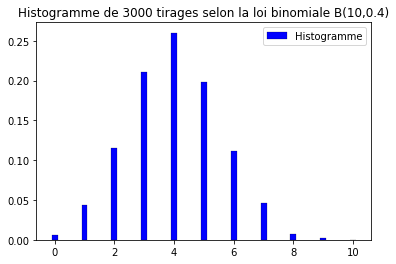

In [3]:
# paramètres de la loi binomiale
n = 10
p = 0.4
# Nombre de tirages
N = 3000

X=rd.binomial(n, p, size=N)

# attention np.arange(0,n+2,1) donne l'intervalle discret [0,n+2[= [0,n+1].
# on lui soustrait ensuite 0.5 pour avoir chaque entier de [0,n] dans un sous-intervalle
bins=np.arange(0,n+2,1)-0.5

# Graphique le plus adapté pour une loin discrète : diagramme en bâtons
# rwidth=0.2 (=ratio_width) signifie que la base des batons occupe 20% des sous-intervalles. 
# density = True permet de tracer l'histogramme des fréquences
plt.hist(X,bins=bins, histtype='bar', color='blue', rwidth=0.2, edgecolor = 'black', linewidth = 0.2, density = True, label = 'Histogramme')

plt.title('Histogramme de '+str(N)+' tirages selon la loi binomiale B('+str(n)+','+str(p)+')')
plt.legend()
plt.show()

* **Comparaison de la loi binomiale de paramètres $(n ; p)$ à la loi de Poisson de $\lambda = n.p$**

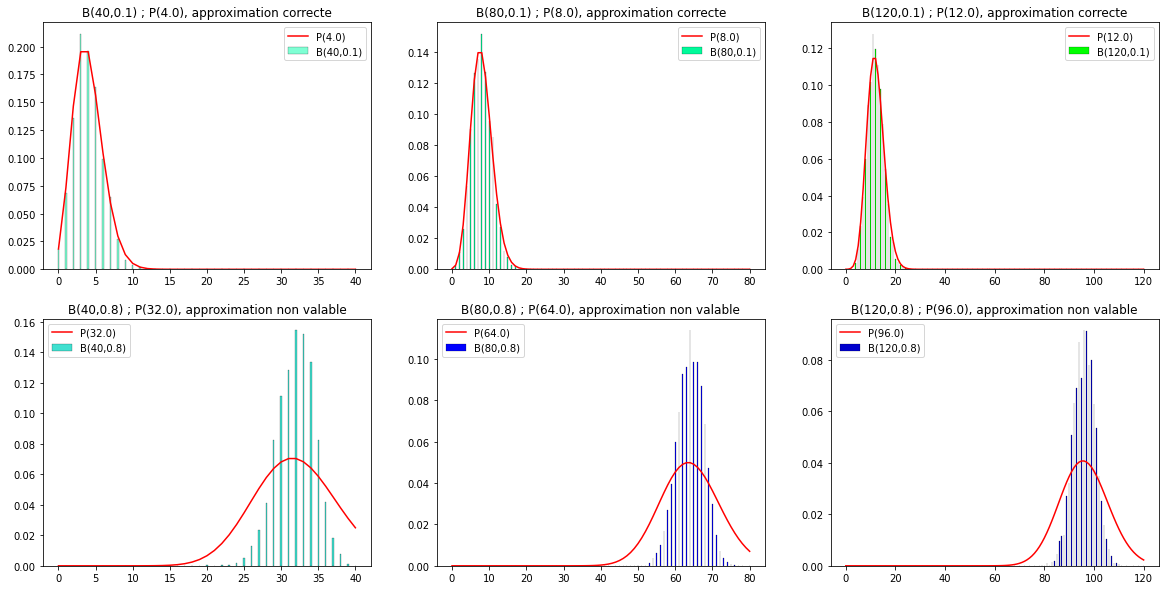

In [4]:
liste_parametres = [(40,0.1), (80, 0.1), (120, 0.1), (40, 0.8), (80,0.8), (120,0.8) ]
couleurs = ['aquamarine','mediumspringgreen','lime','turquoise','blue','mediumblue']
N = 3000

plt.figure(figsize =(20,10))
for i in range(2) :
    for j in range(3) :
        plt.subplot(2,3,i*3 + j + 1) # positionnement dans la bonne sous-fenêtre
        (n,p) = liste_parametres[i*3 + j] # sélection des paramètres dans la liste

        # Calcul du respect des critères d'approximation
        if (n >= 30) & (p <= 0.1) & (n*p < 15) :
            valable = 'approximation correcte'
        else :
            valable = 'approximation non valable'

        X=rd.binomial(n, p, size=N)     # simulation de N tirages selon la loi B(n,p)
        bins=np.arange(0,n+2,1)-0.5     # classes pour l'histogramme
        # Histogramme
        plt.hist(X,bins=bins, histtype='bar', color=couleurs[i*3 + j], rwidth=0.2, edgecolor = 'black', linewidth = 0.2, density = True, label = 'B('+str(n)+','+str(p)+')')
        plt.title('B('+str(n)+','+str(p)+') ; P('+str(n*p)+'), '+ valable)

        # calcul loi de Poisson de même espérance, sur le même univers
        lbda = n*p
        X_omega = list(range(n+1))
        loi = [lbda ** k / factorial(k) * exp(-lbda) for k in X_omega ]
        plt.plot(X_omega, loi, color = 'red', label = 'P('+str(n*p)+')' )

        plt.legend()

plt.show()

**Remarques :**
* On voit qu'avec un p trop grand, l'approximation de la loi binomiale par la loi de Poisson de même espérance n'est pas satisfaisante. D'où le surnom donné à la loi de Poisson de "loi des événements rares"...
* Pour la loi de Poisson, on a tracé de manière continue pour une meilleure visibilité, mais, bien entendu, la loi de Poisson est une loi discrète, donc le diagramme adapté devrait être en bâtons...

## **Convergence en loi d'une suite de lois binomiales vers une normale (approximation d'une suite de lois binomiales par une normale)**

**Rappel des conditions d'utilisation :**
On estime en général qu'une VA X suivant la loi binomiale de paramètre (n ; p) peut être approchée par une VA  Y  suivant une loi normale de paramètre (np ; npq) 
dès lors que : 
$\left\{\begin{matrix}
 n \geqslant 30\\
 n . p \geqslant 15 \\
n . p . q \geqslant 5
\end{matrix}\right.$ (ceci n'étant pas une règle stricte...)


In [5]:
import scipy.stats as stats

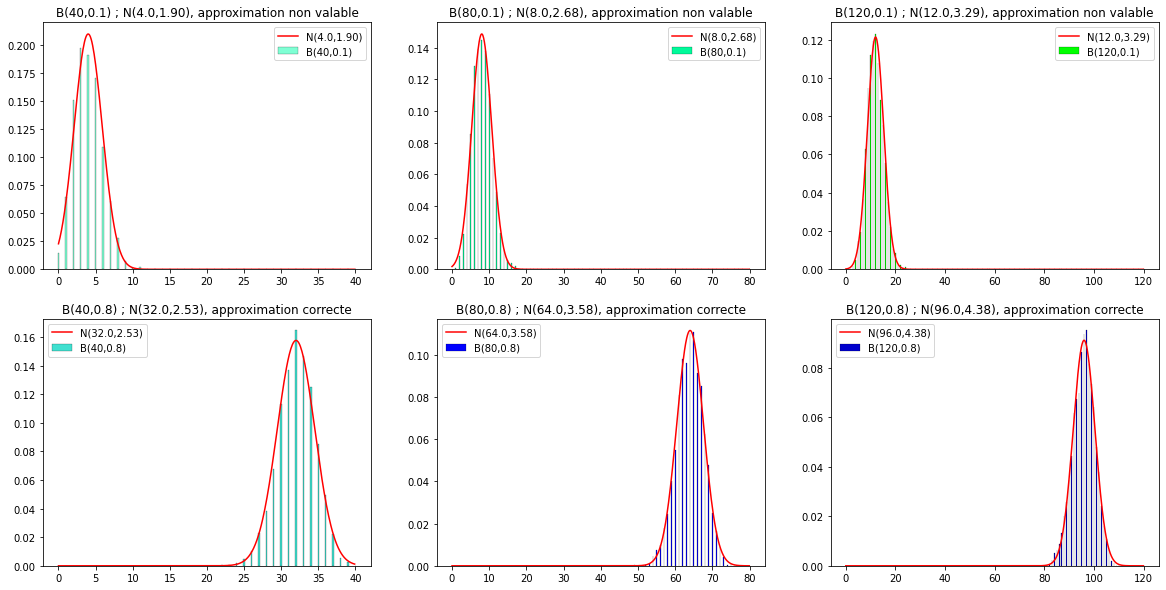

In [6]:
liste_parametres = [(40,0.1), (80, 0.1), (120, 0.1), (40, 0.8), (80,0.8), (120,0.8) ]
couleurs = ['aquamarine','mediumspringgreen','lime','turquoise','blue','mediumblue']

N = 3000

plt.figure(figsize =(20,10))
for i in range(2) :
    for j in range(3) :
        plt.subplot(2,3,i*3 + j + 1) # positionnement dans la bonne sous-fenêtre
        (n,p) = liste_parametres[i*3 + j] # sélection des paramètres dans la liste

        mu = n*p
        sigma = sqrt(n*p*(1-p))

        # Calcul du respect des critères d'approximation
        if (n >= 30) & (n*p >= 15) & (n*p*(1-p) >= 5) :
            valable = 'approximation correcte'
        else :
            valable = 'approximation non valable'

        X=rd.binomial(n, p, size=N)     # simulation de N tirages selon la loi B(n,p)
        bins=np.arange(0,n+2,1)-0.5     # classes pour l'histogramme
        # Histogramme
        plt.hist(X,bins=bins, histtype='bar', color=couleurs[i*3 + j], rwidth=0.2, edgecolor = 'black', linewidth = 0.2, density = True, label = 'B('+str(n)+','+str(p)+')')
        plt.title('B('+str(n)+','+str(p)+') ; N('+str(mu)+','+"{:.2f}".format((sigma))+'), '+ valable)

        # calcul loi de normale de même espérance et de même variance, sur le même univers
        # à partir du module scipy.stats
        
        X_omega = np.arange(0,n, 0.1)
        #densité de la loi normale : module scipy.stats, fonction .norm.pdf() : "probability density function"
        densite = stats.norm.pdf(X_omega, mu, sigma) # rappel : la loi normale se trace avec pour paramètres l'écart-type et non la variance

        plt.plot(X_omega, densite, color = 'red', label = 'N('+str(mu)+','+"{:.2f}".format((sigma))+')' )

        plt.legend()

plt.show()

## **Convergence en loi d'une suite de lois de Poisson vers une loi normale (approximation d'une suite de lois de Poisson par une loi normale)**

**Rappel des conditions d'utilisation :**

la loi de Poisson de paramètre $\lambda$ peut être approximée par la loi normale de même espérance et de même variance $N(\lambda,\lambda)$ lorsque $ \lambda \geqslant 15$.

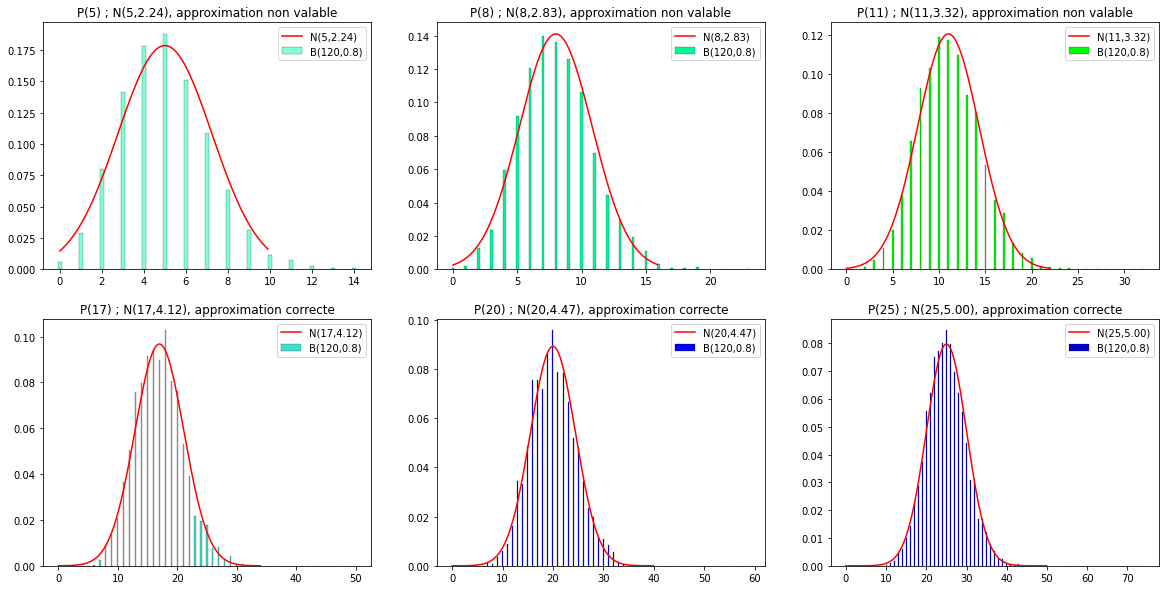

In [7]:
liste_parametres = [5,8,11,17,20,25 ]
couleurs = ['aquamarine','mediumspringgreen','lime','turquoise','blue','mediumblue']
N = 3000

plt.figure(figsize =(20,10))
for i in range(2) :
    for j in range(3) :
        plt.subplot(2,3,i*3 + j + 1) # positionnement dans la bonne sous-fenêtre
        lbda = liste_parametres[i*3 + j] # sélection des paramètres dans la liste

        # Calcul du respect des critères d'approximation
        if (lbda > 15) :
            valable = 'approximation correcte'
        else :
            valable = 'approximation non valable'

        X=rd.poisson(lbda, size=N)     # simulation de N tirages selon la loi B(n,p)
        bins=np.arange(0,3*lbda+1,1)-0.5     # classes pour l'histogramme (on  limite l'univers à 3 x espérance)
        # Histogramme
        plt.hist(X,bins=bins, histtype='bar', color=couleurs[i*3 + j], rwidth=0.2, edgecolor = 'black', linewidth = 0.2, density = True, label = 'B('+str(n)+','+str(p)+')')
        plt.title('P('+str(lbda)+') ; N('+str(lbda)+','+"{:.2f}".format(sqrt(lbda))+'), '+ valable )

        # calcul loi de normale de même espérance et de même variance, sur le même univers
        # à partir du module scipy.stats
        
        X_omega = np.arange(0,2*lbda, 0.1)
        mu = lbda
        sigma = sqrt(lbda)
        #densité de la loi normale : module scipy.stats, fonction .norm.pdf() : "probability density function"
        densite = stats.norm.pdf(X_omega, mu, sigma) # rappel : la loi normale se trace avec pour paramètres l'écart-type et non la variance

        plt.plot(X_omega, densite, color = 'red', label = 'N('+str(mu)+','+"{:.2f}".format((sigma))+')' )

        plt.legend()


plt.show()